# Рубежный контроль №2

## Тема: Методы построения моделей машинного обучения

## Выполнил: Смыслов Дмитрий Олегович, ИУ5-61Б

### Вариант: 16

### Методы: Линейная/логистическая регрессия и Случайный лес

### Набор данных: https://www.kaggle.com/datasets/san-francisco/sf-restaurant-scores-lives-standard

In [1]:
# Импорт библиотек
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
from dython.nominal import associations

In [2]:
data = pd.read_csv('datasets/rk2/restaurant-scores-lives-standard.csv')

In [3]:
# Размер датасета
data.shape

(53973, 23)

In [4]:
# Первые несколько строк
data.head()

,business_id,business_name,business_address,business_city,business_state,business_postal_code,business_latitude,business_longitude,business_location,business_phone_number,...,inspection_type,violation_id,violation_description,risk_category,Neighborhoods (old),Police Districts,Supervisor Districts,Fire Prevention Districts,Zip Codes,Analysis Neighborhoods
0,101192,Cochinita #2,2 Marina Blvd Fort Mason,San Francisco,CA,NaN,NaN,NaN,NaN,1.415043e+10,...,New Ownership,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,97975,BREADBELLY,1408 Clement St,San Francisco,CA,94118,NaN,NaN,NaN,1.415724e+10,...,Routine - Unscheduled,97975_20190725_103124,Inadequately cleaned or sanitized food contact...,Moderate Risk,NaN,NaN,NaN,NaN,NaN,NaN
2,92982,Great Gold Restaurant,3161 24th St.,San Francisco,CA,94110,NaN,NaN,NaN,NaN,...,New Ownership,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,101389,HOMAGE,214 CALIFORNIA ST,San Francisco,CA,94111,NaN,NaN,NaN,1.415488e+10,...,New Construction,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,85986,Pronto Pizza,798 Eddy St,San Francisco,CA,94109,NaN,NaN,NaN,NaN,...,New Ownership,85986_20161011_103114,High risk vermin infestation,High Risk,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Информация о колонках датасета
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53973 entries, 0 to 53972
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   business_id                53973 non-null  int64  
 1   business_name              53973 non-null  object 
 2   business_address           53973 non-null  object 
 3   business_city              53973 non-null  object 
 4   business_state             53973 non-null  object 
 5   business_postal_code       52955 non-null  object 
 6   business_latitude          34417 non-null  float64
 7   business_longitude         34417 non-null  float64
 8   business_location          34417 non-null  object 
 9   business_phone_number      17035 non-null  float64
 10  inspection_id              53973 non-null  object 
 11  inspection_date            53973 non-null  object 
 12  inspection_score           40363 non-null  float64
 13  inspection_type            53973 non-null  obj

In [6]:
# Количество уникальных значений по колонкам
data.nunique()

business_id                   6023
business_name                 5572
business_address              5513
business_city                    1
business_state                   1
business_postal_code            61
business_latitude             2291
business_longitude            2320
business_location             2369
business_phone_number         1861
inspection_id                21718
inspection_date                800
inspection_score                47
inspection_type                 15
violation_id                 31891
violation_description           65
risk_category                    3
Neighborhoods (old)             41
Police Districts                10
Supervisor Districts            11
Fire Prevention Districts       15
Zip Codes                       28
Analysis Neighborhoods          41
dtype: int64

In [7]:
# Какая есть информация для одного ресторана?
# business_id = 85986
data[data['business_id'] == 85986].head()

,business_id,business_name,business_address,business_city,business_state,business_postal_code,business_latitude,business_longitude,business_location,business_phone_number,...,inspection_type,violation_id,violation_description,risk_category,Neighborhoods (old),Police Districts,Supervisor Districts,Fire Prevention Districts,Zip Codes,Analysis Neighborhoods
4,85986,Pronto Pizza,798 Eddy St,San Francisco,CA,94109,NaN,NaN,NaN,NaN,...,New Ownership,85986_20161011_103114,High risk vermin infestation,High Risk,NaN,NaN,NaN,NaN,NaN,NaN
4959,85986,Pronto Pizza,798 Eddy St,San Francisco,CA,94109,NaN,NaN,NaN,NaN,...,New Ownership,85986_20161011_103103,High risk food holding temperature,High Risk,NaN,NaN,NaN,NaN,NaN,NaN
7296,85986,Pronto Pizza,798 Eddy St,San Francisco,CA,94109,NaN,NaN,NaN,NaN,...,New Ownership,85986_20161011_103102,Unclean hands or improper use of gloves,High Risk,NaN,NaN,NaN,NaN,NaN,NaN
7561,85986,Pronto Pizza,798 Eddy St,San Francisco,CA,94109,NaN,NaN,NaN,NaN,...,Complaint,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7945,85986,Pronto Pizza,798 Eddy St,San Francisco,CA,94109,NaN,NaN,NaN,NaN,...,New Ownership,85986_20161011_103154,Unclean or degraded floors walls or ceilings,Low Risk,NaN,NaN,NaN,NaN,NaN,NaN


Таким образом датасет представляет собой записи о проверках
в различных точках питания в Сан-Франциско.
При этом для одной такой точки есть несколько записей о проверках,
каждая из которых может иметь оценку и информацию о каких-либо нарушениях,
если они зафиксированы.

In [8]:
# Как повторяются записи в колонке 'inspection_id' ?
data['inspection_id'].value_counts()

2659_20180327     18
78722_20190814    18
984_20170726      18
59828_20190820    18
38808_20190805    17
                  ..
99872_20190507     1
93968_20180712     1
81442_20180410     1
77651_20180509     1
99764_20190314     1
Name: inspection_id, Length: 21718, dtype: int64

In [9]:
data[data['inspection_id'] == "2659_20180327"][['inspection_score', 'business_id', 'violation_description', 'risk_category']]

,inspection_score,business_id,violation_description,risk_category
20155,77.0,2659,Moderate risk vermin infestation,Moderate Risk
20189,77.0,2659,Moderate risk vermin infestation,Moderate Risk
23926,77.0,2659,Unclean or degraded floors walls or ceilings,Low Risk
23942,77.0,2659,Unclean or degraded floors walls or ceilings,Low Risk
27412,77.0,2659,High risk food holding temperature,High Risk
27809,77.0,2659,High risk food holding temperature,High Risk
28763,77.0,2659,Inadequately cleaned or sanitized food contact...,Moderate Risk
29014,77.0,2659,Inadequately cleaned or sanitized food contact...,Moderate Risk
35071,77.0,2659,Unclean or degraded floors walls or ceilings,Low Risk
35092,77.0,2659,Unclean or degraded floors walls or ceilings,Low Risk


То есть для одной и той же проверки (один 'inspection_id')
может быть несколько строк, если в ней выявлены несколько нарушений

Попробуем построить регрессионную модель для колонки "inspection_score"

In [10]:
# Удаление заведомо ненужных столбцов
cols_to_drop = [
    'business_city',
    'business_state',
    'business_location',
    'violation_id',
    'violation_description',
    'risk_category',
]

In [11]:
for col in cols_to_drop:
    try:
        data.drop([col], axis=1, inplace=True)
    except Exception as e:
        pass

In [12]:
# Удаление дубликатов в столбце 'inspection_id'
data = data.drop_duplicates(['inspection_id'], keep='first')
data['inspection_id'].duplicated().sum()

0

In [13]:
# Удаление строк с пустым значением в целевой колонке 'inspection_score'
data = data.dropna(subset=['inspection_score'])

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12364 entries, 1 to 53952
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   business_id                12364 non-null  int64  
 1   business_name              12364 non-null  object 
 2   business_address           12364 non-null  object 
 3   business_postal_code       12073 non-null  object 
 4   business_latitude          7144 non-null   float64
 5   business_longitude         7144 non-null   float64
 6   business_phone_number      3974 non-null   float64
 7   inspection_id              12364 non-null  object 
 8   inspection_date            12364 non-null  object 
 9   inspection_score           12364 non-null  float64
 10  inspection_type            12364 non-null  object 
 11  Neighborhoods (old)        7134 non-null   float64
 12  Police Districts           7134 non-null   float64
 13  Supervisor Districts       7134 non-null   flo

In [15]:
data.isna().sum()

business_id                     0
business_name                   0
business_address                0
business_postal_code          291
business_latitude            5220
business_longitude           5220
business_phone_number        8390
inspection_id                   0
inspection_date                 0
inspection_score                0
inspection_type                 0
Neighborhoods (old)          5230
Police Districts             5230
Supervisor Districts         5230
Fire Prevention Districts    5240
Zip Codes                    5226
Analysis Neighborhoods       5230
dtype: int64

In [16]:
data.head()

,business_id,business_name,business_address,business_postal_code,business_latitude,business_longitude,business_phone_number,inspection_id,inspection_date,inspection_score,inspection_type,Neighborhoods (old),Police Districts,Supervisor Districts,Fire Prevention Districts,Zip Codes,Analysis Neighborhoods
1,97975,BREADBELLY,1408 Clement St,94118,NaN,NaN,1.415724e+10,97975_20190725,2019-07-25T00:00:00.000,96.0,Routine - Unscheduled,NaN,NaN,NaN,NaN,NaN,NaN
7,95754,Fools Errand,639 Divisadero St A,94117,NaN,NaN,NaN,95754_20190327,2019-03-27T00:00:00.000,84.0,Routine - Unscheduled,NaN,NaN,NaN,NaN,NaN,NaN
8,77005,MoBowL,428 11th St,94103,NaN,NaN,1.415964e+10,77005_20170429,2017-04-29T00:00:00.000,94.0,Routine - Unscheduled,NaN,NaN,NaN,NaN,NaN,NaN
11,4794,VICTOR'S,210 TOWNSEND St,94107,37.778634,-122.393089,1.415561e+10,4794_20181030,2018-10-30T00:00:00.000,71.0,Routine - Unscheduled,34.0,2.0,9.0,6.0,28856.0,34.0
12,71440,"New Garden Restaurant, Inc.",716 Kearny St,94108,NaN,NaN,NaN,71440_20190401,2019-04-01T00:00:00.000,85.0,Routine - Unscheduled,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
total_count = data.shape[0]  # total_count = 506

bad_cols = []
for col in data.columns:
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64' or dt=='object'):
        bad_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print(f"Колонка {col}. Тип данных {dt}. Количество пустых значений {temp_null_count}, {temp_perc}%.")

Колонка business_postal_code. Тип данных object. Количество пустых значений 291, 2.35%.
Колонка business_latitude. Тип данных float64. Количество пустых значений 5220, 42.22%.
Колонка business_longitude. Тип данных float64. Количество пустых значений 5220, 42.22%.
Колонка business_phone_number. Тип данных float64. Количество пустых значений 8390, 67.86%.
Колонка Neighborhoods (old). Тип данных float64. Количество пустых значений 5230, 42.3%.
Колонка Police Districts. Тип данных float64. Количество пустых значений 5230, 42.3%.
Колонка Supervisor Districts. Тип данных float64. Количество пустых значений 5230, 42.3%.
Колонка Fire Prevention Districts. Тип данных float64. Количество пустых значений 5240, 42.38%.
Колонка Zip Codes. Тип данных float64. Количество пустых значений 5226, 42.27%.
Колонка Analysis Neighborhoods. Тип данных float64. Количество пустых значений 5230, 42.3%.


In [18]:
data.nunique()

business_id                   5456
business_name                 5043
business_address              5061
business_postal_code            53
business_latitude             2266
business_longitude            2295
business_phone_number         1649
inspection_id                12364
inspection_date                778
inspection_score                47
inspection_type                  1
Neighborhoods (old)             41
Police Districts                10
Supervisor Districts            11
Fire Prevention Districts       15
Zip Codes                       28
Analysis Neighborhoods          41
dtype: int64

In [19]:
# 'business_address' - категориальный столбец,
# имеет большое число уникальных значений.
# Также у нас уже имеются колонки с готовыми широтой и долготой
# Поэтому столбец удаляем
data = data.drop(['business_address'], axis=1)

In [20]:
# 'business_phone_number' - категориальный признак,
# с огромным числом пропусков, который возможно
# и не несет настолько важной информации
# Поэтому столбец также удаляем
data = data.drop(['business_phone_number'], axis=1)

In [21]:
# Мы получили все что хотели от признака 'inspection_id',
# теперь он является уникальным ключом каждой записи
# Поэтому и его удаляем
data = data.drop(['inspection_id'], axis=1)

In [22]:
# После преобразований, признак 'inspection_type' принимает
# единственное уникальное значение - удаляем
data = data.drop(['inspection_type'], axis=1)

In [23]:
# Удалим строки с пропусками
data = data.dropna()

In [24]:
data.isna().sum()

business_id                  0
business_name                0
business_postal_code         0
business_latitude            0
business_longitude           0
inspection_date              0
inspection_score             0
Neighborhoods (old)          0
Police Districts             0
Supervisor Districts         0
Fire Prevention Districts    0
Zip Codes                    0
Analysis Neighborhoods       0
dtype: int64

In [25]:
# В итоге имеем хорошее количество строк без пропусков
# При этом сохранили пару лишних столбцов, которые могут нести хорошую информацию
data.shape

(7031, 13)

In [26]:
# Кодирование категориальных признаков

column_to_encode = [
    'business_postal_code',
    'business_name',
]

# Используем обычный LabelEncoder, т.к. one-hot кодирование
# выдаст огромное число дополнительных колонок
# т.к. исходные столбцы имеют много уникальных значений
for col in column_to_encode:
    data[col] = LabelEncoder().fit_transform(data[col])

# Кодируем время
data['inspection_date'] = pd.DatetimeIndex(data['inspection_date']).asi8

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7031 entries, 11 to 53853
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   business_id                7031 non-null   int64  
 1   business_name              7031 non-null   int32  
 2   business_postal_code       7031 non-null   int32  
 3   business_latitude          7031 non-null   float64
 4   business_longitude         7031 non-null   float64
 5   inspection_date            7031 non-null   int64  
 6   inspection_score           7031 non-null   float64
 7   Neighborhoods (old)        7031 non-null   float64
 8   Police Districts           7031 non-null   float64
 9   Supervisor Districts       7031 non-null   float64
 10  Fire Prevention Districts  7031 non-null   float64
 11  Zip Codes                  7031 non-null   float64
 12  Analysis Neighborhoods     7031 non-null   float64
dtypes: float64(9), int32(2), int64(2)
memory usage

In [27]:
# Функция построения полной матрицы корреляции
def plot_full_corr_matrix(dataset_, nominal_columns_):
    res_corr = associations(
        dataset=dataset_,
        nominal_columns=nominal_columns_,
        cmap=sns.diverging_palette(220, 20, as_cmap=True),
        title='Полная матрица корреляции',
        clustering=True,
        figsize=(18,18),
        plot=False,
        compute_only=True,
        mark_columns=True,
    )
    corr_matrix = res_corr['corr']
    plt.figure(figsize=(24,16))
    sns.heatmap(
        data=corr_matrix,
        square=True,
        center=0,
        cmap=sns.diverging_palette(220, 20, as_cmap=True),
        annot=True,
        vmin=-1.0,
        vmax=1.0
    )
    plt.show()

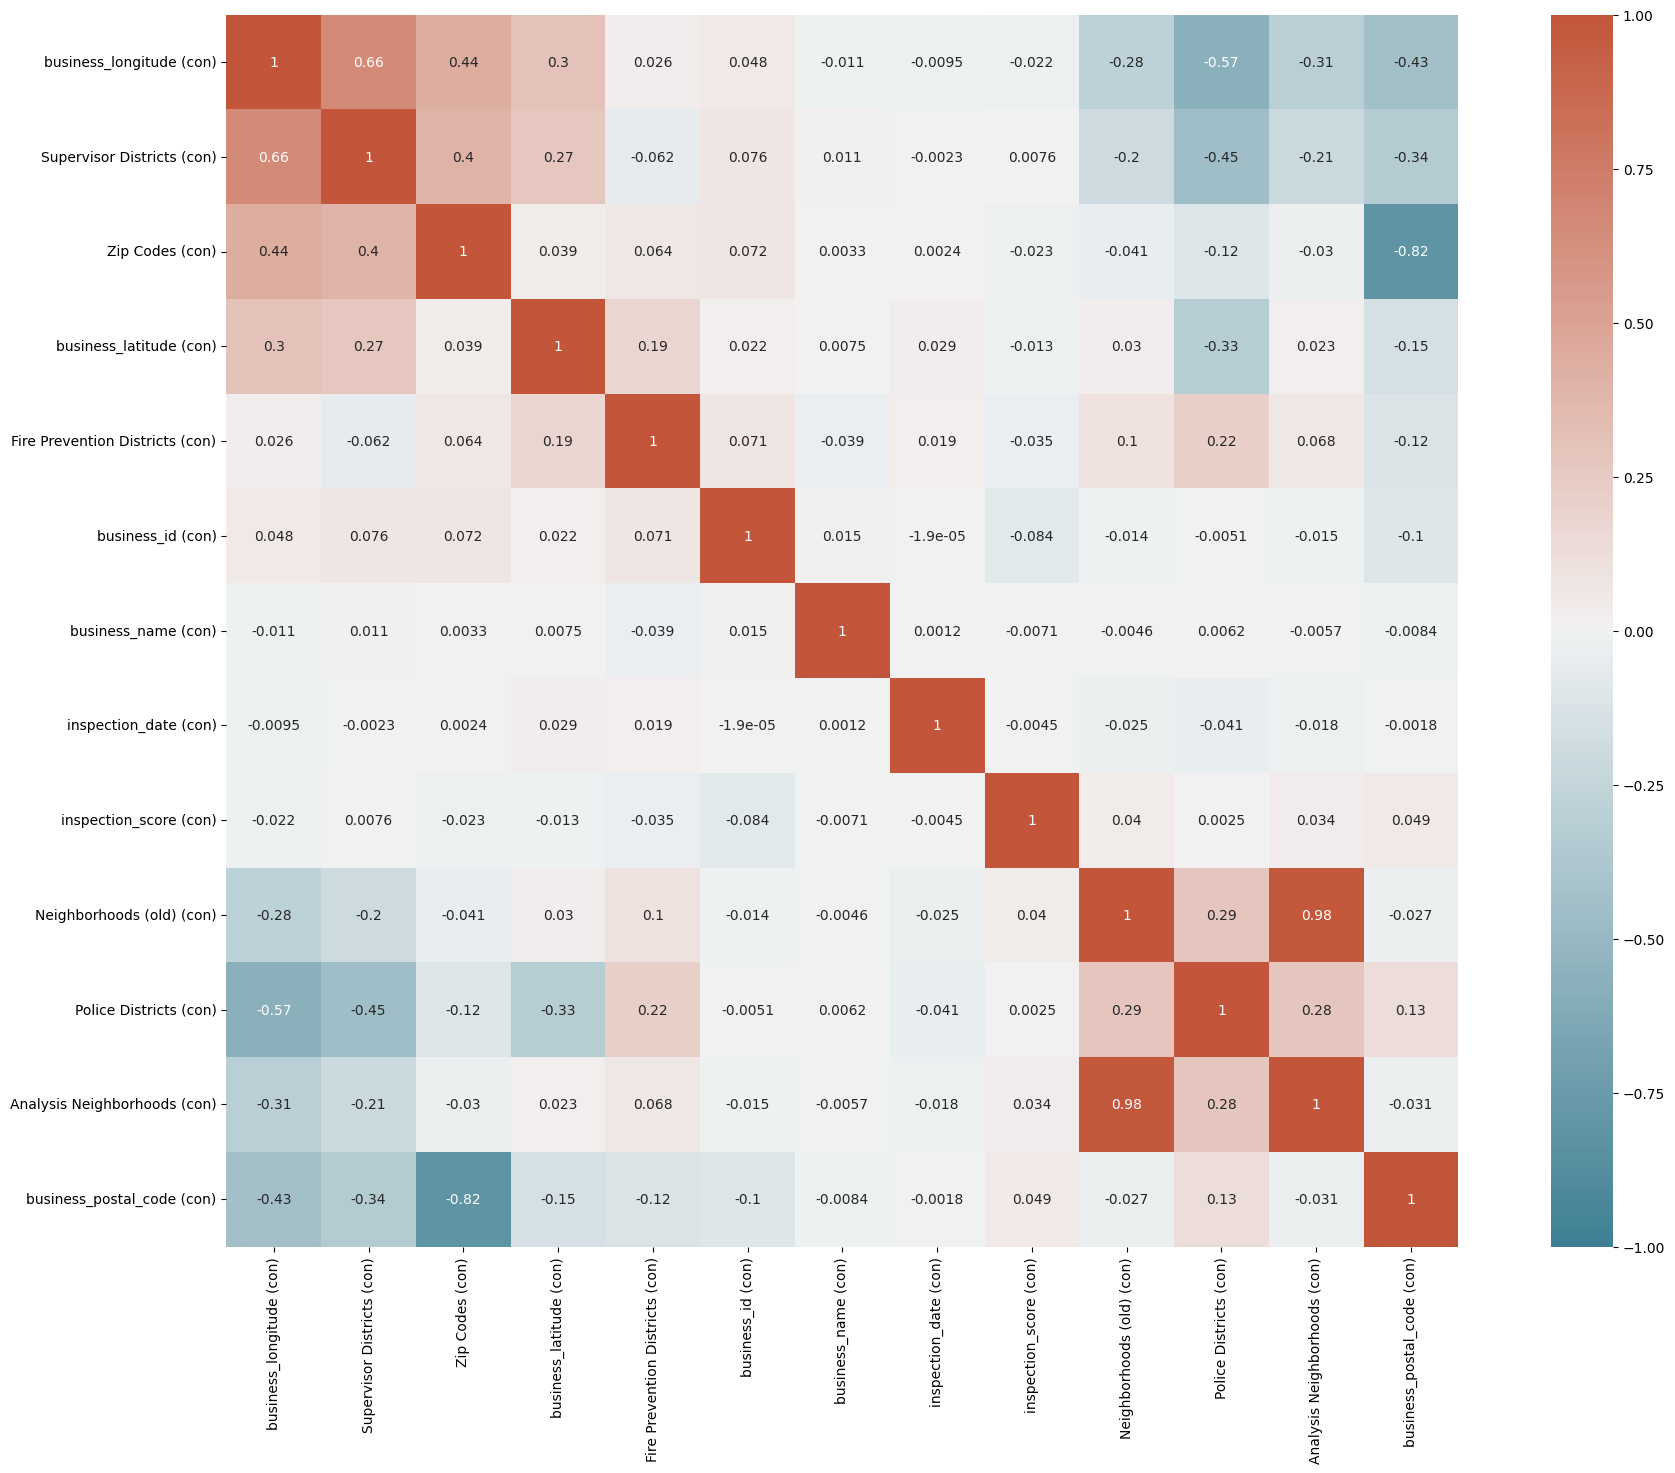

In [28]:
# Матрица корреляции всех признаков
plot_full_corr_matrix(data, [])

# К сожалению наблюдаем очень слабую корреляцию целевого
# признака с остальными, что оставляет мало надежд на
# обучение хорошей модели

# Обучение моделей

### Для оценки моделей используются метрики: Mean Squared Error, Mean Absolute Error и R2 Score

In [29]:
X = data.drop('inspection_score', axis=1).values
y = data['inspection_score'].values
X, y

(array([[4.7940e+03, 2.3920e+03, 7.0000e+00, ..., 6.0000e+00, 2.8856e+04,
         3.4000e+01],
        [6.6517e+04, 1.4070e+03, 3.0000e+00, ..., 7.0000e+00, 2.8852e+04,
         3.6000e+01],
        [3.8231e+04, 2.4610e+03, 2.7000e+01, ..., 3.0000e+00, 3.0800e+02,
         2.3000e+01],
        ...,
        [6.0544e+04, 1.3730e+03, 2.5000e+01, ..., 2.0000e+00, 6.3000e+01,
         1.0000e+01],
        [5.8370e+03, 1.3230e+03, 1.4000e+01, ..., 1.5000e+01, 2.8862e+04,
         5.0000e+00],
        [1.1365e+04, 1.1860e+03, 9.0000e+00, ..., 7.0000e+00, 2.8852e+04,
         3.6000e+01]]),
 array([ 71.,  84.,  92., ...,  98., 100.,  96.]))

In [30]:
# Формирование обучающей и тестовой выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 9)

In [31]:
# Функция отображения результатов
def print_result(
        y_train, y_pred_train,
        y_test, y_pred_test,
):
    print("TRAIN SET: ")
    print(f"Mean Squared Error = {mean_squared_error(y_train, y_pred_train)}")
    print(f"Root Mean Squared Error = {mean_squared_error(y_train, y_pred_train, squared=False)}")
    print(f"Mean Absolute Error = {mean_absolute_error(y_train, y_pred_train)}")
    print(f"R2 Score = {r2_score(y_train, y_pred_train)}")
    print("TEST SET: ")
    print(f"Mean Squared Error = {mean_squared_error(y_test, y_pred_test)}")
    print(f"Root Mean Squared Error = {mean_squared_error(y_test, y_pred_test, squared=False)}")
    print(f"Mean Absolute Error = {mean_absolute_error(y_test, y_pred_test)}")
    print(f"R2 Score = {r2_score(y_test, y_pred_test)}")

In [32]:
# Модель линейной регрессии
lin_reg = LinearRegression(n_jobs=4)
lin_reg.fit(X_train, y_train)
y_pred_test_lin_reg = lin_reg.predict(X_test)
y_pred_train_lin_reg = lin_reg.predict(X_train)

print_result(
    y_train, y_pred_train_lin_reg,
    y_test, y_pred_test_lin_reg
)

TRAIN SET: 
Mean Squared Error = 58.39257917717397
Root Mean Squared Error = 7.64150372486816
Mean Absolute Error = 6.001558329597621
R2 Score = 0.008095336373484585
TEST SET: 
Mean Squared Error = 58.742696869091496
Root Mean Squared Error = 7.6643784398404735
Mean Absolute Error = 6.085756121227737
R2 Score = 0.008360949185298727


Наблюдаем, что результаты обучения модели грубо говоря
не впечатляют. Даже как-то выучить обучающую выборку не получилось,
что может быть следствием плохой корреляции и зависимости от других признаков.

In [33]:
# Модель случайного леса
rnd_forest = RandomForestRegressor()
rnd_forest.fit(X_train, y_train)
y_pred_test_rnd_forest = rnd_forest.predict(X_test)
y_pred_train_rnd_forest = rnd_forest.predict(X_train)

print_result(
    y_train, y_pred_train_rnd_forest,
    y_test, y_pred_test_rnd_forest
)

TRAIN SET: 
Mean Squared Error = 4.973081270744428
Root Mean Squared Error = 2.230040643294294
Mean Absolute Error = 1.6647637110795006
R2 Score = 0.9155231268329838
TEST SET: 
Mean Squared Error = 34.854049147727274
Root Mean Squared Error = 5.903731798424389
Mean Absolute Error = 4.432386363636364
R2 Score = 0.41162666925346836


Как видно, модель случайного леса сильно лучше справилась с задачей,
хотя и на разных параметрах значения метрик не особо меняются
от приведенных выше.

Можно сделать общий вывод, заключающий в том, что исходных данных
не достаточно, чтобы предугадывать результат проверки точки питания,
так как данные в основном состоят из признаков, описывающих
географическое её положение, что не особо влияет на нужный параметр
